In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
Train_data = pd.read_csv('Dataset/Train/Train.csv')
Test_data = pd.read_csv('Dataset/Test/Test.csv')

In [4]:
Train_data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Ukraine,Some college/university study without earning ...,13,"Employed, full-time;Not employed, but looking ...",3290.0
1,Saudi Arabia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Employed, full-time",118388.0
2,Taiwan,Primary/elementary school,6,"Employed, full-time",33355.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time",107000.0
4,United States of America,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time;Student, full-time",44000.0


In [5]:
Test_data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,South Korea,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time",32640.0
1,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Employed, full-time",62296.0
2,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",14,"Employed, full-time",26854.0
3,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Employed, full-time",48333.0
4,Uruguay,"Secondary school (e.g. American high school, G...",2,"Employed, part-time",46926.0


In [6]:
# row and column count of the dataset
print(Train_data.shape)

(18748, 5)


In [7]:
# row and column count of the dataset
print(Test_data.shape)

(4687, 5)


In [8]:
Train_data["Country"].value_counts()

Country
United States of America                                3801
Germany                                                 1651
Ukraine                                                 1184
United Kingdom of Great Britain and Northern Ireland    1086
India                                                    821
                                                        ... 
Brunei Darussalam                                          1
Burundi                                                    1
Bhutan                                                     1
Samoa                                                      1
Togo                                                       1
Name: count, Length: 161, dtype: int64

In [9]:
Test_data["Country"].value_counts()

Country
United States of America                                876
Germany                                                 395
United Kingdom of Great Britain and Northern Ireland    305
Ukraine                                                 290
India                                                   216
                                                       ... 
Mozambique                                                1
Namibia                                                   1
Mauritius                                                 1
Tajikistan                                                1
Sudan                                                     1
Name: count, Length: 137, dtype: int64

In [10]:
# shorten the country whose count is less than 250 in Train data and 100 in Test data
Train_data["Country"] = Train_data["Country"].apply(lambda x: 'Other' if Train_data['Country'].value_counts()[x] < 250 else x)
Test_data["Country"] = Test_data["Country"].apply(lambda x: 'Other' if Test_data['Country'].value_counts()[x] < 100 else x)


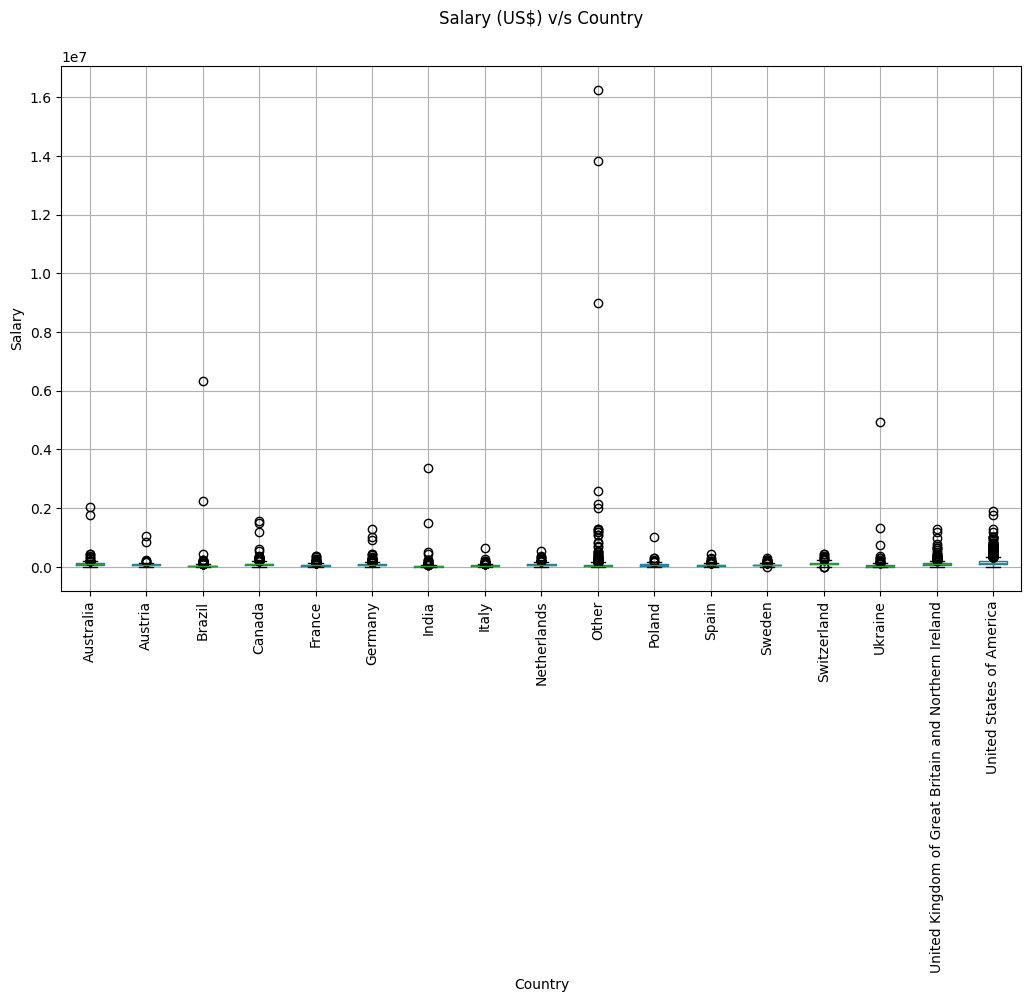

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
Train_data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v/s Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [12]:
Train_data = Train_data[Train_data['Salary'] <= 250000]
Train_data = Train_data[Train_data['Salary'] >= 10000]
Train_data = Train_data[Train_data['Country'] != 'Other']

Test_data = Test_data[Test_data['Salary'] <= 250000]
Test_data = Test_data[Test_data['Salary'] >= 10000]
Test_data = Test_data[Test_data['Country'] != 'Other']


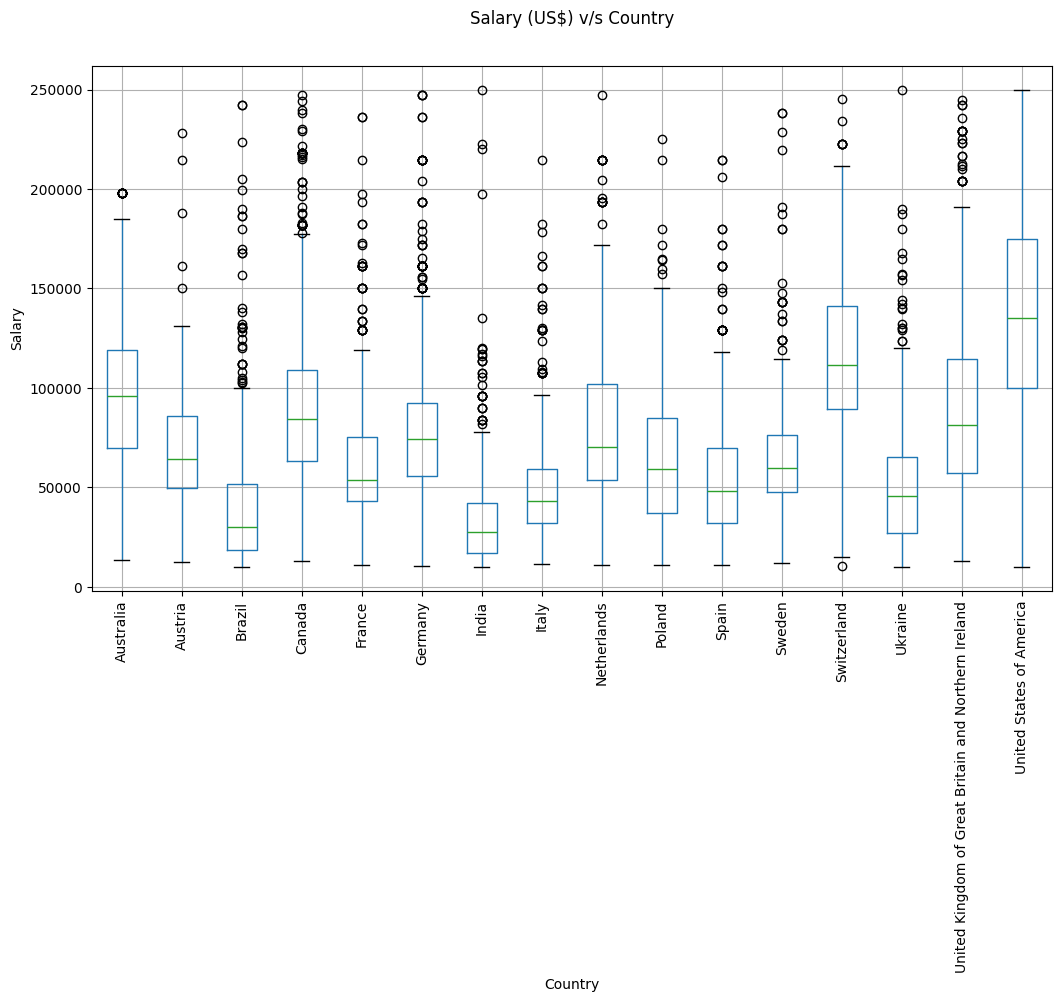

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
Train_data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v/s Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [19]:
Train_data["YearsCodePro"].unique()

array([ 4. ,  6. ,  5. , 12. ,  7. ,  1. , 28. , 10. ,  8. , 20. ,  0.5,
       11. ,  3. , 15. , 13. , 25. , 14. , 22. , 21. , 16. , 18. , 17. ,
        2. , 31. , 38. ,  9. , 19. , 24. , 27. , 23. , 26. , 39. , 36. ,
       30. , 42. , 40. , 45. , 33. , 29. , 32. , 41. , 34. , 35. , 50. ,
       37. , 44. , 46. , 43. , 48. , 49. , 47. ])

In [18]:
Test_data["YearsCodePro"].unique()

array([ 4. , 14. ,  9. ,  1. ,  2. ,  6. , 10. ,  0.5,  3. ,  8. , 16. ,
       22. , 12. , 45. , 20. ,  7. , 29. , 25. , 28. , 13. ,  5. , 11. ,
       26. , 39. , 15. , 34. , 17. , 30. , 33. , 18. , 21. , 19. , 43. ,
       27. , 24. , 35. , 40. , 23. , 32. , 38. , 31. , 42. , 50. , 36. ,
       41. , 37. , 46. , 44. , 47. ])

In [16]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

Train_data['YearsCodePro'] = Train_data['YearsCodePro'].apply(clean_experience)
Test_data['YearsCodePro'] = Test_data['YearsCodePro'].apply(clean_experience)

In [17]:
# the nan values are filled with the median of the column
Train_data['YearsCodePro'] = Train_data['YearsCodePro'].fillna(Train_data['YearsCodePro'].median())
Test_data['YearsCodePro'] = Test_data['YearsCodePro'].fillna(Test_data['YearsCodePro'].median())

In [21]:
Train_data["Country"].unique()

array(['United States of America', 'Spain', 'Canada', 'Germany',
       'Australia', 'India', 'Austria', 'Netherlands', 'Italy', 'Brazil',
       'Sweden', 'France', 'Poland',
       'United Kingdom of Great Britain and Northern Ireland', 'Ukraine',
       'Switzerland'], dtype=object)

In [26]:
Train_data["EdLevel"].unique()

array(['Bachelor’s degree', 'Post grad', 'Less than a Bachelors',
       'Master’s degree'], dtype=object)

In [25]:
Test_data["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [24]:
# clean the education level
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

Train_data['EdLevel'] = Train_data['EdLevel'].apply(clean_education)
Test_data['EdLevel'] = Test_data['EdLevel'].apply(clean_education)

In [31]:
Train_data["Employment"].unique()

array(['Full Time', 'Independent', 'Other'], dtype=object)

In [30]:
Test_data["Employment"].unique()

array(['Full Time', 'Independent', 'Other'], dtype=object)

In [29]:
# clean the employment column
def clean_employment(x):
    if 'Independent' in x:
        return 'Independent'
    if 'freelance' in x:
        return 'Independent'
    if 'contract' in x:
        return 'Independent'
    if 'full-time' in x:
        return 'Full Time'
    return 'Other'

Train_data['Employment'] = Train_data['Employment'].apply(clean_employment)
Test_data['Employment'] = Test_data['Employment'].apply(clean_employment)

In [84]:
le_education = LabelEncoder()
Train_data['EdLevel'] = le_education.fit_transform(Train_data['EdLevel'])
Test_data['EdLevel'] = le_education.transform(Test_data['EdLevel'])

In [85]:
le_country = LabelEncoder()
Train_data['Country'] = le_country.fit_transform(Train_data['Country'])
Test_data['Country'] = le_country.transform(Test_data['Country'])

In [91]:
le_employment = LabelEncoder()
Train_data['Employment'] = le_employment.fit_transform(Train_data['Employment'])
Test_data['Employment'] = le_employment.transform(Test_data['Employment'])

In [92]:
x = Train_data.drop('Salary', axis=1)
y = Train_data['Salary']

In [93]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x, y.values)

LinearRegression()

In [95]:
# prediction
x_test = Test_data.drop('Salary', axis=1)
y_pred = linear_reg.predict(x_test)

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

error = np.sqrt(mean_squared_error(Test_data['Salary'], y_pred))

In [97]:
error

np.float64(45088.476409856376)

In [98]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x, y.values)

DecisionTreeRegressor(random_state=0)

In [99]:
y_pred = dec_tree_reg.predict(x_test)

In [100]:
error = np.sqrt(mean_squared_error(Test_data['Salary'], y_pred))
error

np.float64(39543.8636428986)

In [101]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators=100)
random_forest_reg.fit(x, y.values)

RandomForestRegressor()

In [102]:
y_pred = random_forest_reg.predict(x_test)

In [103]:
error = np.sqrt(mean_squared_error(Test_data['Salary'], y_pred))
error

np.float64(37565.252004251124)

In [104]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12, 14, 16]
parameters = {'max_depth': max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16]},
             scoring='neg_mean_squared_error')

In [105]:
regressor = gs.best_estimator_
regressor.fit(x, y.values)
y_pred = regressor.predict(x_test)
error = np.sqrt(mean_squared_error(Test_data['Salary'], y_pred))
error

np.float64(36625.34201220068)

In [106]:
# save the best model
import pickle
data = {'model': regressor, 'le_country': le_country, 'le_education': le_education, 'le_employment': le_employment}
with open('model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [107]:
# load the model
with open('model.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data['model']
le_country = data['le_country']
le_education = data['le_education']
le_employment = data['le_employment']

In [108]:
y_pred = regressor_loaded.predict(x_test)
y_pred

array([ 52540.69565217,  59923.14035088,  52540.69565217, ...,
        22927.39130435,  89500.25      , 165044.55307263])

In [109]:
# calculate the error
error = np.sqrt(mean_squared_error(Test_data['Salary'], y_pred))
error

np.float64(36625.34201220068)